## Objective
Create the Key statistics dashboard and graphs for chapter "The popularity of SBTi"


# Importing, loading data, visuals and error corrections

In [60]:
#Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.font_manager as font_manager
import seaborn as sns
import pandas as pd
import numpy as np
from bokeh.plotting import figure, show, output_file
from bokeh.models import ColumnDataSource, HoverTool, Slider, CustomJS, Legend, LegendItem
from bokeh.layouts import column
from bokeh.palettes import Category20
from bokeh.palettes import TolRainbow
from bokeh.transform import factor_cmap
from bokeh.plotting import output_notebook

from itertools import cycle
# Ensure Bokeh plots are displayed in the notebook
output_notebook()

Loading BokehJS ...

In [61]:
#Font properties for the plots
#font_prop = font_manager.FontProperties(fname='C:\\Windows\\Fonts\\source-sans-pro.ttf')
font_reg = font_manager.FontProperties(fname="C:/Fonts/SourceSansPro-Regular.otf")
font_bold = font_manager.FontProperties(fname="C:/Fonts/SourceSansPro-Bold.otf")
font_italic = font_manager.FontProperties(fname="C:/Fonts/SourceSansPro-It.otf")
font_light = font_manager.FontProperties(fname="C:/Fonts/SourceSansPro-Light.otf")

In [62]:
sbt_palette = [
    "#F26749",  # Crab
    "#F5B7B1",  # Warm Blush
    "#83A5F2",  # Vista blue
    "#204ECF",  # Deep Ocean
    "#EA9836",  # Butterscotch
    # Pastel extended palette
    "#F28C70",  # Lighter Crab
    "#B23A1D",  # Darker Crab
    "#FADBD8",  # Lighter Warm Blush
    "#E5989B",  # Deeper Warm Blush
    "#A1B6F5",  # Lighter Vista Blue
    "#516FD9",  # Midpoint Blue
    "#122E8A",  # Darker Deep Ocean
    "#7C9BF2",  # Muted Vista Blue
    "#A8D5BA",  # Lighter Green (Replacing Lighter Butterscotch)
    "#9C4700",  # More Contrasty Butterscotch
    "#F2E1DC",  # Soft Neutral
    "#F4C2C2",  # Warm Neutral
    "#CBD4F7",  # Soft Cool Tone
    "#BFD0E5",  # Neutral Blue Tint
    "#D47A5F",  # Earthy Warm Blend
    "#8C9EFF",  # Punchy Cool Accent
    "#F7D59C",  # Pale Orange Glow
    "#F7A76C",  # Vibrant Warm
    "#D44A1C",  # Bold Warm Tone
    "#8390F2",  # Cool Complement 
]

In [63]:
# Load the data
filepath1 = r'ByCompany.csv'
Comp = pd.read_csv(filepath1, sep=';')
filepath2 = r'ByTargets.csv'
Targ = pd.read_csv(filepath2, sep=';')

In [64]:
# Mapping of sectors to categories
sector_category_map = {
    'Ground Transportation - Railroads Transportation': 'Transportation',
    'Semiconductors and Semiconductors Equipment': 'Technology',
    'Air Freight Transportation and Logistics': 'Transportation',
    'Trading Companies and Distributors, and Commercial Services and Supplies': 'Commercial Services',
    'Water Transportation - Water Transportation': 'Transportation',
    'Food and Beverage Processing': 'Food and Beverage',
    'Telecommunication Services': 'Telecommunication',
    'Construction and Engineering': 'Construction',
    'Pharmaceuticals, Biotechnology and Life Sciences': 'Healthcare',
    'Professional Services': 'Professional Services',
    'Containers and Packaging': 'Packaging',
    'Real Estate': 'Real Estate',
    'Consumer Durables, Household and Personal Products': 'Consumer Products',
    'Electric Utilities and Independent Power Producers and Energy Traders (including Fossil, Alternative and Nuclear Energy)': 'Energy',
    'Retailing': 'Retail',
    'Mining - Iron, Aluminum, Other Metals': 'Mining',
    'Textiles, Apparel, Footwear and Luxury Goods': 'Consumer Products',
    'Software and Services': 'Technology',
    'Hotels, Restaurants and Leisure, and Tourism Services': 'Hospitality',
    'Electrical Equipment and Machinery': 'Manufacturing',
    'Food Production - Agricultural Production': 'Food Production',
    'Building Products': 'Construction',
    'Food and Staples Retailing': 'Retail',
    'Automobiles and Components': 'Automotive',
    'Forest and Paper Products - Forestry, Timber, Pulp and Paper, Rubber': 'Forestry and Paper Products',
    'Tobacco': 'Tobacco',
    'Solid Waste Management Utilities': 'Utilities',
    'Chemicals': 'Chemicals',
    'Construction Materials': 'Construction',
    'Technology Hardware and Equipment': 'Technology',
    'Mining - Other (Rare Minerals, Precious Metals and Gems)': 'Mining',
    'Water Utilities': 'Utilities',
    'Homebuilding': 'Construction',
    'Ground Transportation - Highways and Railtracks': 'Transportation',
    'Food Production - Animal Source Food Production': 'Food Production',
    'Healthcare Equipment and Supplies': 'Healthcare',
    'Air Transportation - Airport Services': 'Transportation',
    'Media': 'Media',
    'Banks, Diverse Financials, Insurance': 'Financial Services',
    'Ground Transportation - Trucking Transportation': 'Transportation',
    'Specialized Consumer Services': 'Consumer Services',
    'Specialized Financial Services, Consumer Finance, Insurance Brokerage Firms': 'Financial Services',
    'Healthcare Providers and Services, and Healthcare Technology': 'Healthcare',
    'Water Transportation - Ports and Services': 'Transportation',
    'Air Transportation - Airlines': 'Transportation',
    'Aerospace and Defense': 'Defense',
    'Tires': 'Automotive',
    'Education Services': 'Education',
    'Gas Utilities': 'Utilities'
}

# Function to map sectors to categories
def map_category(sector):
    return sector_category_map.get(sector, 'Unknown')
# Apply the function to the 'sector' column
Targ['sectorCat'] = Targ['sector'].apply(map_category)
Comp['sectorCat'] = Comp['sector'].apply(map_category)
# Display the DataFrame
Targ['sectorCat'].unique()
# Place sectorCat next to sector in the DataFrame
Targ = Targ[['sector', 'sectorCat'] + [col for col in Targ.columns if col not in ['sector', 'sectorCat']]]
Comp = Comp[['sector', 'sectorCat'] + [col for col in Comp.columns if col not in ['sector', 'sectorCat']]]

In [65]:
#make Targ['date_published'] a datetime object
Targ['date_published'] = pd.to_datetime(Targ['date_published'], errors='coerce')
#seperate year from date_published
Targ['Comitted year'] = Targ['date_published'].dt.year
#sort targ by year
Targ = Targ.sort_values(by='Comitted year', ascending=True)
# limit to 2015-2024
Targ = Targ[Targ['Comitted year'].between(2015, 2024)]
#check if year is sorted correctly
Targ['Comitted year'].unique()

array([2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022, 2023, 2024])

In [66]:
# Remove duplicates of stbi_id in Targ to make counting easier
#Targ = Targ.drop_duplicates(subset=['sbti_id'])

In [67]:

Comp['date_updated'] = pd.to_datetime(Comp['date_updated'], errors='coerce')
#isolating year in Comp
Comp['year_updated'] = Comp['date_updated'].dt.year
Comp=Comp.sort_values(by='year_updated', ascending=True)
Comp = Comp[Comp['year_updated'].between(2015, 2024)]
#Check if year is sorted correctly
Comp['year_updated'].unique()

C:\Users\gfjgu\AppData\Local\Temp\ipykernel_16652\645255393.py:1: UserWarning: Parsing dates in %d-%m-%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  Comp['date_updated'] = pd.to_datetime(Comp['date_updated'], errors='coerce')


array([2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022, 2023, 2024])

In [68]:
Comp.head()

,sector,sectorCat,sbti_id,company_name,organization_type,location,region,near_term_status,near_term_target_classification,near_term_target_year,...,long_term_target_year,net_zero_status,net_zero_year,reason_for_extension_or_removal,date_updated,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,year_updated
4243,"Banks, Diverse Financials, Insurance",Financial Services,40008661,Teachers Mutual Bank,Financial Institution,Australia,Oceania,Commitment removed,NaN,NaN,...,NaN,NaN,NaN,Expired commitment,2015-11-01,NaN,NaN,NaN,NaN,2015
4300,Ground Transportation - Railroads Transportation,Transportation,40005752,Thalys,Corporate,Belgium,Europe,Targets set,Well-below 2°C,2020,...,NaN,NaN,NaN,NaN,2015-10-30,NaN,NaN,NaN,NaN,2015
527,"Banks, Diverse Financials, Insurance",Financial Services,40007348,AXA Group,Financial Institution,France,Europe,Committed,NaN,NaN,...,NaN,NaN,NaN,Commitment Compliance Policy transitory grace ...,2015-06-01,NaN,NaN,NaN,NaN,2015
573,"Banks, Diverse Financials, Insurance",Financial Services,40013764,Bank J. Safra Sarasin AG,Financial Institution,Switzerland,Europe,Committed,NaN,NaN,...,NaN,NaN,NaN,FINZ extension policy,2015-06-01,NaN,NaN,NaN,NaN,2015
2206,"Banks, Diverse Financials, Insurance",Financial Services,40005141,ING,Financial Institution,Netherlands,Europe,Committed,NaN,NaN,...,NaN,NaN,NaN,FINZ extension policy,2015-06-01,NaN,NaN,NaN,NaN,2015


In [69]:
Targ.head()

,sector,sectorCat,sbti_id,company_name,location,region,organization_type,action,company_temperature_alignment,target,scope,target_value,type,sub_type,target_classification_short,base_year,target_year,date_published,Comitted year
9915,Ground Transportation - Railroads Transportation,Transportation,40005752,Thalys,Belgium,Europe,Corporate,Target,Well-below 2°C,Near-term,1+2+3,"41,40%",Intensity,Reduction,Well-below 2°C,2008,2020,2015-10-30,2015
9916,Ground Transportation - Railroads Transportation,Transportation,40005752,Thalys,Belgium,Europe,Corporate,Target,Well-below 2°C,Near-term,3,"50,00%",Engagement,Other,NaN,2017,2020,2015-10-30,2015
506,Semiconductors and Semiconductors Equipment,Technology,40015387,"Advanced Micro Devices, Inc",United States of America,Northern America,Corporate,Target,Well-below 2°C,Near-term,3,"0,4",Engagement,Other,NaN,2014,2020,2016-06-27,2016
505,Semiconductors and Semiconductors Equipment,Technology,40015387,"Advanced Micro Devices, Inc",United States of America,Northern America,Corporate,Target,Well-below 2°C,Near-term,3,30%,Engagement,Other,NaN,2014,2020,2016-06-27,2016
5137,Air Freight Transportation and Logistics,Transportation,40010493,International Post Corporation (IPC),Belgium,Europe,Corporate,Target,2°C,Near-term,1+2+3,20%,Intensity,Reduction,2°C,2013,2025,2016-02-05,2016


# Key statistical dashboard
We want to make the following key numbers and present them with a nice finish
1. Total companies with SBTi targets validated by the SBTi by the end of 2024
2. Increase in the number of companies with SBTi targets by the end of 2024 compared to 2023
3. Nr of companies set SBTi targets for the first time in 2024
4. Increase in companies with net-zero targets in 2024
5. Total accumulative expired targets
6. Total companies that have retracted their targets

In [70]:
# Count number of commitments in company data --------- 1
Comp['commitments'] = Comp.groupby('company_name')['company_name'].transform('count')

# Count the increase in commitments between 2023 and 2024 in company data
Comp['commitments_2023'] = Comp[Comp['year_updated'].isin([2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022, 2023])]['commitments']
Comp['commitments_2024'] = Comp[Comp['year_updated'] == 2024]['commitments'] # ------------ 3

# Calculate the % increase in commitments between 2023 and 2024 # ------------ 2
Pincrease24 = (Comp['commitments_2024'].sum() / Comp['commitments_2023'].sum()) * 100

# Count net zero targets in target data
Targ['net_zero'] = Targ[Targ['target'] == 'Net-zero'].groupby('sbti_id')['sbti_id'].transform('count')

# Count net zero targets in 2024 in target data ------------- 4
Targ['net_zero_24'] = Targ[(Targ['target'] == 'Net-zero') & (Targ['Comitted year'] == 2024)].groupby('sbti_id')['sbti_id'].transform('count')

#Count companies with expired commitments ------------- 5
Comp['Expired'] = Comp[Comp['reason_for_extension_or_removal'] == 'Expired commitment'].groupby('sbti_id')['sbti_id'].transform('count')

# Count companies wih retracted commitments ------------- 6
Comp['Withdrawn'] = Comp[Comp['reason_for_extension_or_removal'] == 'Withdrawn commitment'].groupby('sbti_id')['sbti_id'].transform('count')

# Highlighting 6 key values
# Storing the values in a dictionary for easy access
Comp_values = {
    'Nr of commitments to SBTi': int(Comp['commitments'].sum()),
    'Increase of commitments 2024 to 2023': f"{Pincrease24:.0f}%",  # Display as percentage
    'Nr of commitments in 2024': int(Comp['commitments_2024'].sum()),
    'Nr of net zero targets set in 2024': int(Targ['net_zero_24'].sum()),
    'Nr of expired targets': int(Comp['Expired'].sum()),
    'Nr of retracted targets': int(Comp['Withdrawn'].sum())
}
# Display the values
for key, value in Comp_values.items():
    print(f"{key}: {value}")


Nr of commitments to SBTi: 10058
Increase of commitments 2024 to 2023: 81%
Nr of commitments in 2024: 4506
Nr of net zero targets set in 2024: 867
Nr of expired targets: 920
Nr of retracted targets: 32


In [71]:
# Creating a dashboard image for the key statistical data (horisontal layout)
from PIL import Image, ImageDraw, ImageFont

img = Image.new('RGB', (1200, 600), color=(255, 255, 255))
draw = ImageDraw.Draw(img)

# Load fonts
font_reg1 = ImageFont.truetype("C:/Fonts/SourceSansPro-Regular.otf")
font_bold1 = ImageFont.truetype("C:/Fonts/SourceSansPro-Bold.otf", size=100)
font_italic1 = ImageFont.truetype("C:/Fonts/SourceSansPro-It.otf")
font_light1 = ImageFont.truetype("C:/Fonts/SourceSansPro-Light.otf", size=30)

# Define positions for the items in two horizontal lines with increased spacing
positions = [(150, 50), (500, 50), (850, 50), (150, 300), (500, 300), (850, 300)]
comment_positions = [(150, 150), (500, 150), (850, 150), (150, 400), (500, 400), (850, 400)]

# Ensure all iterables have the same length
num_items = min(len(positions), len(comment_positions), len(Comp_values.items()), len(sbt_palette))

# Draw the items
for pos, comment_pos, (key, value), color in zip(positions[:num_items], comment_positions[:num_items], list(Comp_values.items())[:num_items], sbt_palette[:num_items]):
    draw.text(pos, str(value), fill=color, font=font_bold1)  # Larger font for values
    # Set maximum length for text
    max_length = 20  # Maximum number of characters per line
    if len(key) > max_length:
        # Break the text into two lines if it exceeds the maximum length
        key_lines = [key[:max_length], key[max_length:]]
        draw.text((comment_pos[0], comment_pos[1]), key_lines[0].replace('_', ' ').title(), fill=color, font=font_light1)
        draw.text((comment_pos[0], comment_pos[1] + 30), key_lines[1].replace('_', ' ').title(), fill=color, font=font_light1)
    else:
        draw.text((comment_pos[0], comment_pos[1]), key.replace('_', ' ').title(), fill=color, font=font_light1)

img.show()

In [72]:
# Creating a smaller image for the first item in the dashboard
img1= Image.new('RGB', (400, 200), color=(255, 255, 255))
draw1 = ImageDraw.Draw(img1)

# Define positions
position = (50, 25)
comment_position = (50, 125)

# Draw the item
key, value = list(Comp_values.items())[0]
draw1.text(position, str(value), fill=sbt_palette[0], font=font_bold1)  # Larger font for the value
draw1.text(comment_position, key.replace('_', ' ').title(), fill=sbt_palette[0], font=font_light1)

img1.show()

In [73]:
# Creating a smaller image for the second item in the dashboard
img2= Image.new('RGB', (400, 200), color=(255, 255, 255))
draw2 = ImageDraw.Draw(img2)

# Draw the item
key, value = list(Comp_values.items())[1]
draw2.text(position, str(value), fill=sbt_palette[1], font=font_bold1)  # Larger font for the value
# Set maximum length for text
max_length = 23  # Maximum number of characters per line
if len(key) > max_length:
    # Break the text into two lines if it exceeds the maximum length
    key_lines = [key[:max_length], key[max_length:]]
    draw2.text(comment_position, key_lines[0].replace('_', ' ').title(), fill=sbt_palette[1], font=font_light1)
    draw2.text((comment_position[0], comment_position[1] + 30), key_lines[1].replace('_', ' ').title(), fill=sbt_palette[1], font=font_light1)
else:
    draw2.text(comment_position, key.replace('_', ' ').title(), fill=sbt_palette[0], font=font_light1)

img2.show()

In [74]:
# Creating a smaller image for the third item in the dashboard
img3= Image.new('RGB', (400, 200), color=(255, 255, 255))
draw3 = ImageDraw.Draw(img3)

# Draw the item
key, value = list(Comp_values.items())[2]
draw3.text(position, str(value), fill=sbt_palette[2], font=font_bold1)  # Larger font for the value
# Set maximum length for text
max_length = 18  # Maximum number of characters per line
if len(key) > max_length:
    # Break the text into two lines if it exceeds the maximum length
    key_lines = [key[:max_length], key[max_length:]]
    draw3.text(comment_position, key_lines[0].replace('_', ' ').title(), fill=sbt_palette[2], font=font_light1)
    draw3.text((comment_position[0], comment_position[1] + 30), key_lines[1].replace('_', ' ').title(), fill=sbt_palette[2], font=font_light1)
else:
    draw3.text(comment_position, key.replace('_', ' ').title(), fill=sbt_palette[0], font=font_light1)

img3.show()

In [75]:
# Creating a smaller image for the fourth item in the dashboard
img4= Image.new('RGB', (400, 200), color=(255, 255, 255))
draw4 = ImageDraw.Draw(img4)

# Draw the item
key, value = list(Comp_values.items())[3]
draw4.text(position, str(value), fill=sbt_palette[3], font=font_bold1)  # Larger font for the value
# Set maximum length for text
max_length = 15  # Maximum number of characters per line
if len(key) > max_length:
    # Break the text into two lines if it exceeds the maximum length
    key_lines = [key[:max_length], key[max_length:]]
    draw4.text(comment_position, key_lines[0].replace('_', ' ').title(), fill=sbt_palette[3], font=font_light1)
    draw4.text((comment_position[0], comment_position[1] + 30), key_lines[1].replace('_', ' ').title(), fill=sbt_palette[3], font=font_light1)
else:
    draw4.text(comment_position, key.replace('_', ' ').title(), fill=sbt_palette[0], font=font_light1)

img4.show()

In [76]:
# Creating a smaller image for the fifth item in the dashboard
img5= Image.new('RGB', (400, 200), color=(255, 255, 255))
draw5 = ImageDraw.Draw(img5)

# Draw the item
key, value = list(Comp_values.items())[4]
draw5.text(position, str(value), fill=sbt_palette[4], font=font_bold1)  # Larger font for the value
draw5.text(comment_position, key.replace('_', ' ').title(), fill=sbt_palette[4], font=font_light1)

img5.show()

In [77]:
# Creating a smaller image for the sixth item in the dashboard
img6= Image.new('RGB', (400, 200), color=(255, 255, 255))
draw6 = ImageDraw.Draw(img6)

# Draw the item
key, value = list(Comp_values.items())[5]
draw6.text(position, str(value), fill=sbt_palette[5], font=font_bold1)  # Larger font for the value
draw6.text(comment_position, key.replace('_', ' ').title(), fill=sbt_palette[5], font=font_light1)

img6.show()

In [78]:
# Creating images for all items in the dashboard but in a vertical layout
img11 = Image.new('RGB', (550, 1200), color=(255, 255, 255))  # Adjust height to fit all items
draw11 = ImageDraw.Draw(img11)

# Define positions for each item
positions = [(50, 25 + i * 200) for i in range(len(Comp_values))]
comment_positions = [(50, 125 + i * 200) for i in range(len(Comp_values))]

# Draw each item
for i, ((key, value), position, comment_position) in enumerate(zip(Comp_values.items(), positions, comment_positions)):
    draw11.text(position, str(value), fill=sbt_palette[i % len(sbt_palette)], font=font_bold1)  # Larger font for the value
    draw11.text(comment_position, key.replace('_', ' ').title(), fill=sbt_palette[i % len(sbt_palette)], font=font_light1)

img11.show()

In [79]:
import os

# Ensure the directory exists
output_dir = r'/images'
os.makedirs(output_dir, exist_ok=True)

# Save the image
img.save(os.path.join(output_dir, 'horizontal_dashboard.png'))
img1.save(os.path.join(output_dir, 'img1.png'))
img2.save(os.path.join(output_dir, 'img2.png'))
img3.save(os.path.join(output_dir, 'img3.png'))
img4.save(os.path.join(output_dir, 'img4.png'))
img5.save(os.path.join(output_dir, 'img5.png'))
img6.save(os.path.join(output_dir, 'img6.png'))
img11.save(os.path.join(output_dir, 'vertical_dashboad.png'))



# The graphs for chapter "The popularity of SBTi"
Graph answering the questions:
* When did it start?
* How has it grown?
* How has popularity grown based on organisation type (SME, corporation, financial etc)?

Graphs answering the questions:
* What countries and industry sectors were the first to register?
* With which countries and industries is SBTi most popular?
* What industries are most popular in each european country?

In [80]:
# Count the increase in commitments between 2023 and 2024 in company data
Comp['commitments_2015'] = Comp[Comp['year_updated'].isin([2015])]['commitments']
Comp['commitments_2016'] = Comp[Comp['year_updated'].isin([2015, 2016])]['commitments']
Comp['commitments_2017'] = Comp[Comp['year_updated'].isin([2015, 2016, 2017])]['commitments']
Comp['commitments_2018'] = Comp[Comp['year_updated'].isin([2015, 2016, 2017, 2018])]['commitments']
Comp['commitments_2019'] = Comp[Comp['year_updated'].isin([2015, 2016, 2017, 2018, 2019])]['commitments']
Comp['commitments_2020'] = Comp[Comp['year_updated'].isin([2015, 2016, 2017, 2018, 2019, 2020])]['commitments']
Comp['commitments_2021'] = Comp[Comp['year_updated'].isin([2015, 2016, 2017, 2018, 2019, 2020, 2021])]['commitments']
Comp['commitments_2022'] = Comp[Comp['year_updated'].isin([2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022])]['commitments']
Comp['commitments_2023'] = Comp[Comp['year_updated'].isin([2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022, 2023])]['commitments']
Comp['commitments_2024'] = Comp[Comp['year_updated'].isin([2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022, 2023, 2024])]['commitments']

# Create a new DataFrame for the commitments over the years
commitments_data = {
    'Year': ['2015', '2016', '2017', '2018', '2019', '2020', '2021', '2022', '2023', '2024'],
    'Commitments': [
        Comp['commitments_2015'].sum(),
        Comp['commitments_2016'].sum(),
        Comp['commitments_2017'].sum(),
        Comp['commitments_2018'].sum(),
        Comp['commitments_2019'].sum(),
        Comp['commitments_2020'].sum(),
        Comp['commitments_2021'].sum(),
        Comp['commitments_2022'].sum(),
        Comp['commitments_2023'].sum(),
        Comp['commitments_2024'].sum()
    ]
}

# Convert the dictionary to a DataFrame
commitments_df = pd.DataFrame(commitments_data)

# Display the first few rows of the DataFrame
commitments_df.head(10)


,Year,Commitments
0,2015,6.0
1,2016,14.0
2,2017,20.0
3,2018,35.0
4,2019,126.0
5,2020,296.0
6,2021,951.0
7,2022,2405.0
8,2023,5552.0
9,2024,10058.0


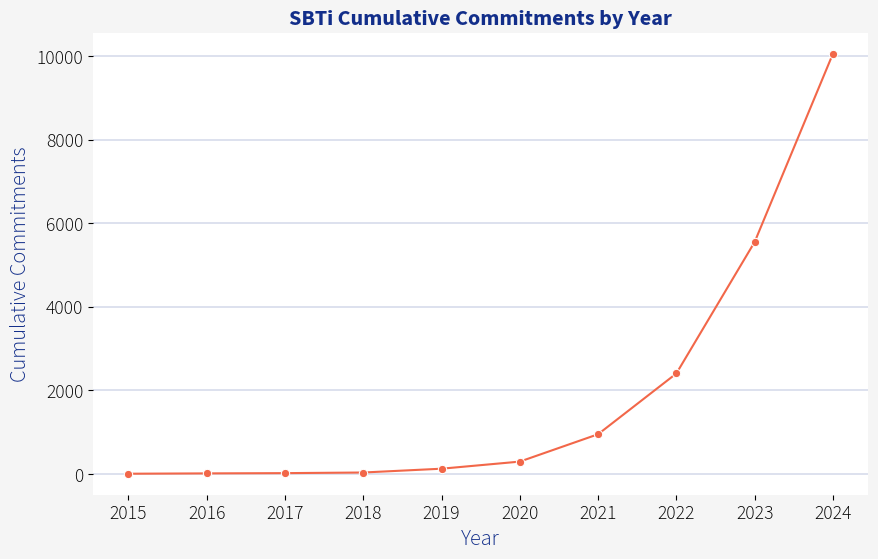

In [81]:

# Create a lineplot of the number of commitments per year
plt.figure(facecolor="#f5f5f5", figsize=(10, 6))
sns.lineplot(data=commitments_df, x='Year', y='Commitments', marker='o', color=sbt_palette[0])

plt.title('SBTi Cumulative Commitments by Year', fontproperties=font_bold, fontsize=16, fontweight='bold', color="#122E8A")
plt.xlabel('Year', fontproperties=font_light, fontsize=16, color="#122E8A")
plt.ylabel('Cumulative Commitments', fontproperties=font_light, fontsize=16, color="#122E8A")
plt.xticks(fontproperties=font_light, fontsize=14)
plt.yticks(fontproperties=font_light, fontsize=14)
plt.grid(False)

# Remove the frame of the plot
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['left'].set_visible(False)
plt.gca().spines['bottom'].set_visible(False)
plt.gca().yaxis.grid(True, linestyle='-', linewidth=0.2, color="#122E8A", zorder=0)




In [82]:
#sorting the number of companies with validated targets away from companies with commited or removed commitment
org = Comp[['organization_type', 'near_term_status', 'long_term_status', ' net_zero_status', 'year_updated']].reset_index(drop=True)

# Create an empty list to store rows for the result
rows = []

# Loop through the rows of the dataset
for index, row in org.iterrows():
    # Check if "Targets set" exists in any of the relevant columns
    if any(status == "Targets set" for status in [row["near_term_status"], row["long_term_status"], row[" net_zero_status"]]):
        # Append the row's relevant data to the list
        rows.append({
            "organization_type": row["organization_type"],
            "year_updated": row["year_updated"]
        })

# Convert the list of rows into a new DataFrame
org_sorted = pd.DataFrame(rows)

#count the number of companies within each organisational type with validated targets 
org_growth = org_sorted.groupby(['organization_type', 'year_updated']).size().reset_index(name='count') 


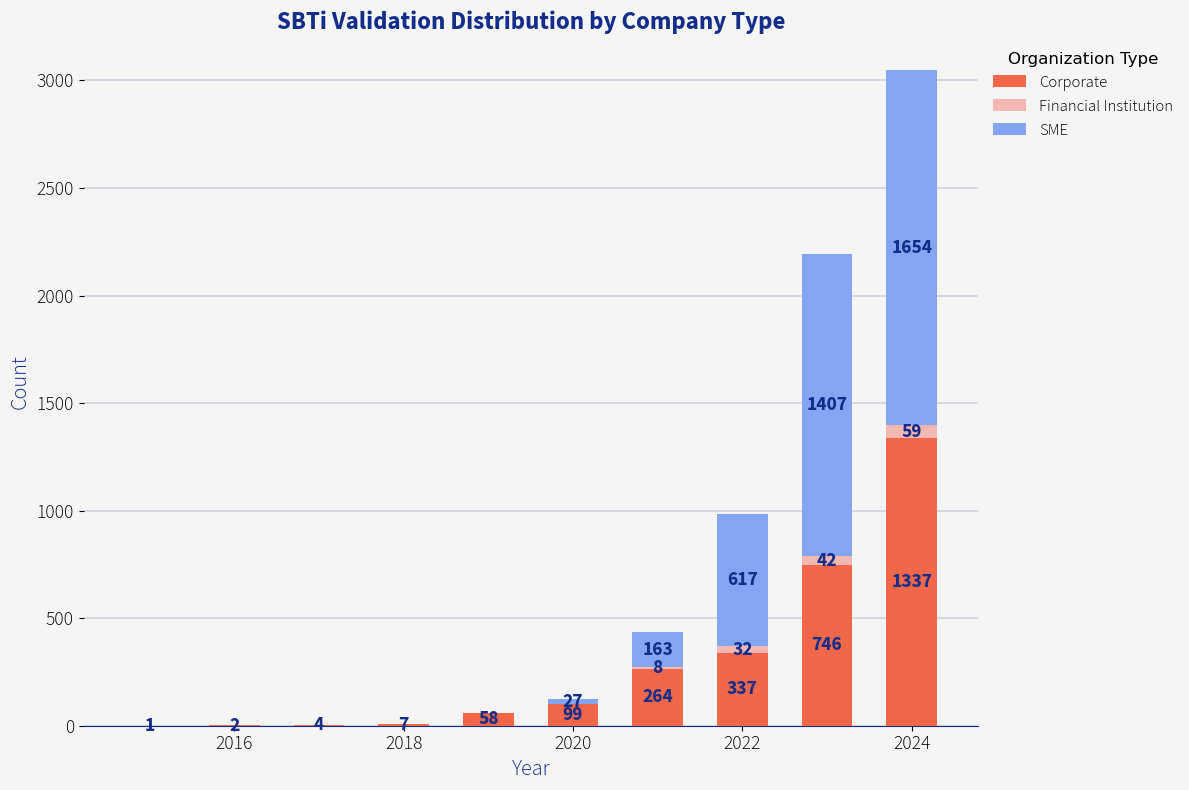

In [83]:
# Pivot the data to prepare it for stacked bar plotting
pivot_data = org_growth.pivot(index="year_updated", columns="organization_type", values="count").fillna(0)

# Sort by year
pivot_data = pivot_data.sort_index()

# Plot background color and bar color
fig, ax = plt.subplots(facecolor="#f5f5f5", figsize=(12, 8))  # Set fixed plot size (width, height)

# Adjust the width of the bars here to change the distance between them
bar_width = 0.6  # Change this value to make bars closer (lower value) or farther apart (higher value)

# Plot stacked bars
bottom_vals = None
for i, col in enumerate(pivot_data.columns):
    if bottom_vals is None:
        bars = ax.bar(pivot_data.index, pivot_data[col], color=sbt_palette[i], zorder=3, width=bar_width, label=col)
        bottom_vals = pivot_data[col]
    else:
        ax.bar(pivot_data.index, pivot_data[col], color=sbt_palette[i], zorder=3, width=bar_width, label=col, bottom=bottom_vals)
        bottom_vals += pivot_data[col]

# Set facecolor
ax.set_facecolor("#f5f5f5")

# Set title with font properties
ax.set_title("SBTi Validation Distribution by Company Type", fontproperties=font_bold, fontsize=18, fontweight='bold', color="#122E8A")
ax.set_ylabel("Count", fontproperties=font_light, fontsize=16, color="#122E8A")
ax.set_xlabel("Year", fontproperties=font_light, fontsize=16, color="#122E8A")
ax.tick_params(axis='x', labelsize=14)
ax.tick_params(axis='y', labelsize=14)

for label in ax.get_xticklabels():
    label.set_fontproperties(font_light)
    label.set_size(14)

for label in ax.get_yticklabels():
    label.set_fontproperties(font_light)
    label.set_size(14)

# Add data labels to the stacked bars
for bar_group in ax.containers:
    for bar in bar_group:
        if bar.get_height() > 0:  # Only label non-zero bars
            ax.text(
                bar.get_x() + bar.get_width() / 2, 
                bar.get_y() + bar.get_height() / 2, 
                f'{int(bar.get_height())}', 
                ha='center', va='center', fontsize=14, color="#122E8A", fontproperties=font_bold
            )

# Spines and grid
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)    
ax.spines['left'].set_visible(False)    
ax.spines['bottom'].set_color("#122E8A")
ax.yaxis.grid(True, linestyle='-', linewidth=0.2, color="#122E8A", zorder=0)
font_legend = font_manager.FontProperties(fname="C:/Fonts/SourceSansPro-Light.otf", size=12)  # Set the font size here


# Add legend
ax.legend(
    title="Organization Type", 
    loc="upper left", 
    bbox_to_anchor=(1, 1), 
    frameon=False, 
    prop=font_legend,
    title_fontsize=12
)

plt.tight_layout()
plt.show()

In [84]:
#sorting the number of companies with validated targets away from companies with commited or removed commitment
sect = Comp[['sectorCat', 'near_term_status', 'long_term_status', ' net_zero_status', 'year_updated']].reset_index(drop=True)

# Create an empty list to store rows for the result
rows = []

# Loop through the rows of the dataset
for index, row in sect.iterrows():
    # Check if "Targets set" exists in any of the relevant columns
    if any(status == "Targets set" for status in [row["near_term_status"], row["long_term_status"], row[" net_zero_status"]]):
        # Append the row's relevant data to the list
        rows.append({
            "sectorCat": row["sectorCat"],
            "year_updated": row["year_updated"]
        })

# Convert the list of rows into a new DataFrame
sect_sorted = pd.DataFrame(rows)

#count the number of companies within each organisational type with validated targets 
sect_growth = sect_sorted.groupby(['sectorCat', 'year_updated']).size().reset_index(name='count') 

# Calculate cumulative sum
sect_cumsum = (
    sect_growth
    .sort_values(by=['sectorCat', 'year_updated'])  # Ensure data is sorted by sector and year
    .groupby('sectorCat', as_index=False)  # Group by sector
    .apply(lambda x: x.assign(cumsum_count=x['count'].cumsum()))  # Add cumulative sum column
    .reset_index(drop=True)  # Reset index for a clean dataframe
)

# Display the result
print(sect_cumsum)



      sectorCat  year_updated  count  cumsum_count
0    Automotive          2019      5             5
1    Automotive          2020      8            13
2    Automotive          2021     12            25
3    Automotive          2022     33            58
4    Automotive          2023     94           152
..          ...           ...    ...           ...
151   Utilities          2020      1             3
152   Utilities          2021      5             8
153   Utilities          2022     15            23
154   Utilities          2023     32            55
155   Utilities          2024     39            94

[156 rows x 4 columns]


C:\Users\gfjgu\AppData\Local\Temp\ipykernel_16652\65377021.py:28: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  .apply(lambda x: x.assign(cumsum_count=x['count'].cumsum()))  # Add cumulative sum column


In [85]:
# Display the top 10 sectorCat that is associated with the highest number of cumsum_count
top_10_sectors = sect_cumsum.nlargest(10, 'cumsum_count')
print("Top 10 sectorCat with the highest number of cumsum_count:", top_10_sectors)
highest_sector = sect_cumsum.loc[sect_cumsum['cumsum_count'].idxmax(), 'sectorCat']
print(f"The sectorCat with the highest number of cumsum_count is: {highest_sector}")

Top 10 sectorCat with the highest number of cumsum_count:                  sectorCat  year_updated  count  cumsum_count
109  Professional Services          2024    353           773
23            Construction          2024    333           711
130             Technology          2024    337           686
30       Consumer Products          2024    274           612
87           Manufacturing          2024    334           584
108  Professional Services          2023    238           420
22            Construction          2023    212           378
64       Food and Beverage          2024    144           376
129             Technology          2023    217           349
29       Consumer Products          2023    188           338
The sectorCat with the highest number of cumsum_count is: Professional Services


In [86]:
# Display the bottom 10 sectorCat that is associated with the lowest number of cumsum_count
bottom_10_sectors = sect_cumsum.nsmallest(10, 'cumsum_count')
print("Bottom 10 sectorCat with the lowest number of cumsum_count:", bottom_10_sectors)

Bottom 10 sectorCat with the lowest number of cumsum_count:                       sectorCat  year_updated  count  cumsum_count
6                     Chemicals          2019      1             1
12          Commercial Services          2017      1             1
24            Consumer Products          2018      1             1
31            Consumer Services          2021      1             1
41                       Energy          2018      1             1
51              Food Production          2019      1             1
57            Food and Beverage          2017      1             1
65  Forestry and Paper Products          2020      1             1
82                Manufacturing          2019      1             1
92                       Mining          2018      1             1


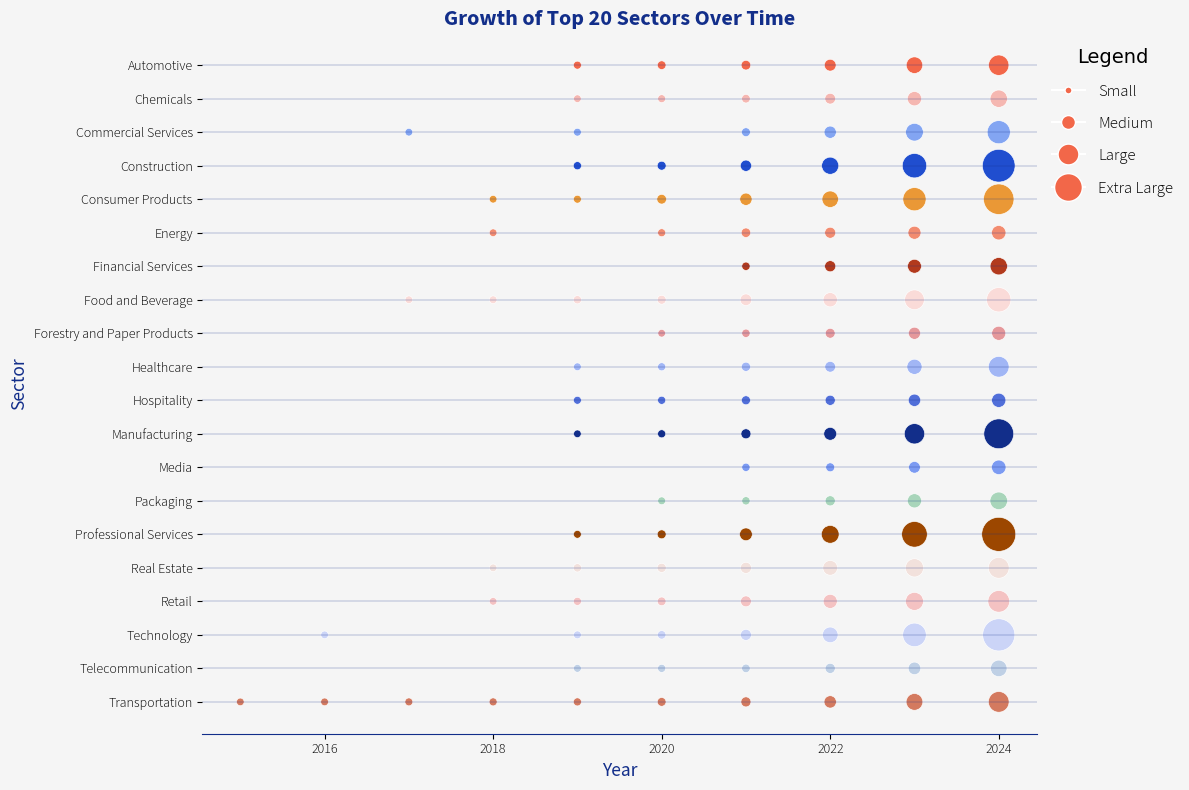

In [87]:
# Filter the dataset to reduce size (e.g., only include top 10 sectors by cumulative count)
top_sectors = sect_cumsum.groupby("sectorCat")["cumsum_count"].max().nlargest(20).index
filtered_data = sect_cumsum[sect_cumsum["sectorCat"].isin(top_sectors)]

# Ensure sbt_palette has enough colors for the filtered sectors
unique_sectors = filtered_data["sectorCat"].unique()
if len(sbt_palette) < len(unique_sectors):
    from itertools import cycle
    extended_palette = list(cycle(sbt_palette))[:len(unique_sectors)]
else:
    extended_palette = sbt_palette

# Create the color map
color_map = dict(zip(unique_sectors, extended_palette[:len(unique_sectors)]))

# Create the plot
fig, ax = plt.subplots(figsize=(12, 8), facecolor="#f5f5f5")
ax.set_facecolor("#f5f5f5")

# Bubble scatterplot
bubble_plot = sns.scatterplot(
    data=filtered_data,
    x="year_updated",
    y="sectorCat",
    size="cumsum_count",
    hue="sectorCat",
    palette=color_map,
    sizes=(30, 600),
    alpha=1,
    ax=ax,
    legend=False
)

# Horizontal gridlines
ax.yaxis.grid(True, linestyle='-', linewidth=0.2, color="#122E8A", zorder=0)  # Gridlines are behind the bubbles

# Titles and labels
bubble_plot.set_title("Growth of Top 20 Sectors Over Time", fontproperties=font_bold, fontsize=16, color="#122E8A")
bubble_plot.set_xlabel("Year", fontproperties=font_reg, fontsize=14, color="#122E8A")
bubble_plot.set_ylabel("Sector", fontproperties=font_reg, fontsize=14, color="#122E8A")

# Tick styling
ax.tick_params(axis='x', labelsize=12)
ax.tick_params(axis='y', labelsize=12)
for label in ax.get_xticklabels():
    label.set_fontproperties(font_light)
for label in ax.get_yticklabels():
    label.set_fontproperties(font_light)


# Add a legend for bubble sizes
# Create a custom legend for bubble sizes
handles = [
    plt.Line2D([0], [0], marker='o', color='w', label='Small', markersize=5, markerfacecolor='#F26749'),
    plt.Line2D([0], [0], marker='o', color='w', label='Medium', markersize=10, markerfacecolor='#F26749'),
    plt.Line2D([0], [0], marker='o', color='w', label='Large', markersize=15, markerfacecolor='#F26749'),
    plt.Line2D([0], [0], marker='o', color='w', label='Extra Large', markersize=20, markerfacecolor='#F26749')
]
labels = ['Small', 'Medium', 'Large', 'Extra Large']

# Add the custom legend to the plot
ax.legend(
    handles=handles,
    labels=labels,
    title="Legend",
    bbox_to_anchor=(1, 1),
    loc="upper left",
    fontsize=12,
    frameon=False,
    prop=font_legend,
    labelspacing=1,
    title_fontsize=14
)

# Spines cleanup
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_color("#122E8A")

plt.tight_layout()
plt.show()

In [88]:
#sorting the number of companies with validated targets away from companies with commited or removed commitment
by = Comp[['location', 'near_term_status', 'long_term_status', ' net_zero_status', 'region']].reset_index(drop=True)

# Create an empty list to store rows for the result
rows = []

# Loop through the rows of the dataset
for index, row in by.iterrows():
    # Check if "Targets set" exists in any of the relevant columns
    if any(status == "Targets set" for status in [row["near_term_status"], row["long_term_status"], row[" net_zero_status"]]):
        # Append the row's relevant data to the list
        rows.append({
            "location": row["location"],
            "region": row["region"]
        })

# Convert the list of rows into a new DataFrame
by_sorted = pd.DataFrame(rows)

#count the number of companies within each organisational type with validated targets 
by_region = by_sorted.groupby(['location', 'region']).size().reset_index(name='count') 

by_region.head

<bound method NDFrame.head of                     location                           region  count
0                Afghanistan                             Asia      1
1                    Albania                           Europe      1
2                  Argentina  Latin America and the Caribbean      4
3                  Australia                          Oceania     75
4                    Austria                           Europe     51
..                       ...                              ...    ...
79            United Kingdom                           Europe   1043
80  United States of America                 Northern America    704
81                   Uruguay  Latin America and the Caribbean      2
82                  Viet Nam                             Asia     12
83                    Zambia                           Africa      1

[84 rows x 3 columns]>

In [89]:
#sort by region
by_region = by_region.sort_values(by='region', ascending=True)

# Merge regions Northern America and Latin America into one region called Americas
by_region['region'] = by_region['region'].replace({'Northern America': 'Americas', 'Latin America and the Caribbean': 'Americas'})

# Merge regions Africa, Oceania and MENA into one region called Africa, Oceania, MENA
by_region['region'] = by_region['region'].replace({'Africa': 'Africa, Oceania, MENA', 'Oceania': 'Africa, Oceania, MENA', 'MENA': 'Africa, Oceania, MENA'})

# Find top locations for each region based on the specified criteria
by_region_top = by_region.groupby('region').apply(
    lambda x: pd.concat([
        x.nlargest(10, 'count') if x.name == 'Europe' else
        x.nlargest(5, 'count') if x.name == 'Asia' else
        x.nlargest(3, 'count') if x.name == 'Americas' else
        x.nlargest(1, 'count') if x.name == 'Africa, Oceania, MENA' else
        pd.DataFrame(),
        pd.DataFrame({'location': ['Other'], 'region': [x.name], 'count': [x['count'].iloc[10:].sum()]}) if x.name == 'Europe' else
        pd.DataFrame({'location': ['Other'], 'region': [x.name], 'count': [x['count'].iloc[5:].sum()]}) if x.name == 'Asia' else
        pd.DataFrame({'location': ['Other'], 'region': [x.name], 'count': [x['count'].iloc[3:].sum()]}) if x.name == 'Americas' else
        pd.DataFrame({'location': ['Other'], 'region': [x.name], 'count': [x['count'].iloc[2:].sum()]}) if x.name == 'Africa, Oceania, MENA' else
        pd.DataFrame()
    ])
).reset_index(drop=True)


# Display the result
print(by_region_top)

# save the DataFrame to a CSV file

                     location                 region  count
0                   Australia  Africa, Oceania, MENA     75
1                       Other  Africa, Oceania, MENA    154
2    United States of America               Americas    704
3                      Canada               Americas     92
4                      Brazil               Americas     48
5                       Other               Americas    910
6                       Japan                   Asia   1408
7                       China                   Asia    312
8                       India                   Asia    204
9   Taiwan, Province of China                   Asia     97
10           Hong Kong, China                   Asia     63
11                      Other                   Asia    814
12             United Kingdom                 Europe   1043
13                    Germany                 Europe    369
14                     Sweden                 Europe    326
15                     France           

C:\Users\gfjgu\AppData\Local\Temp\ipykernel_16652\1467128871.py:11: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  by_region_top = by_region.groupby('region').apply(


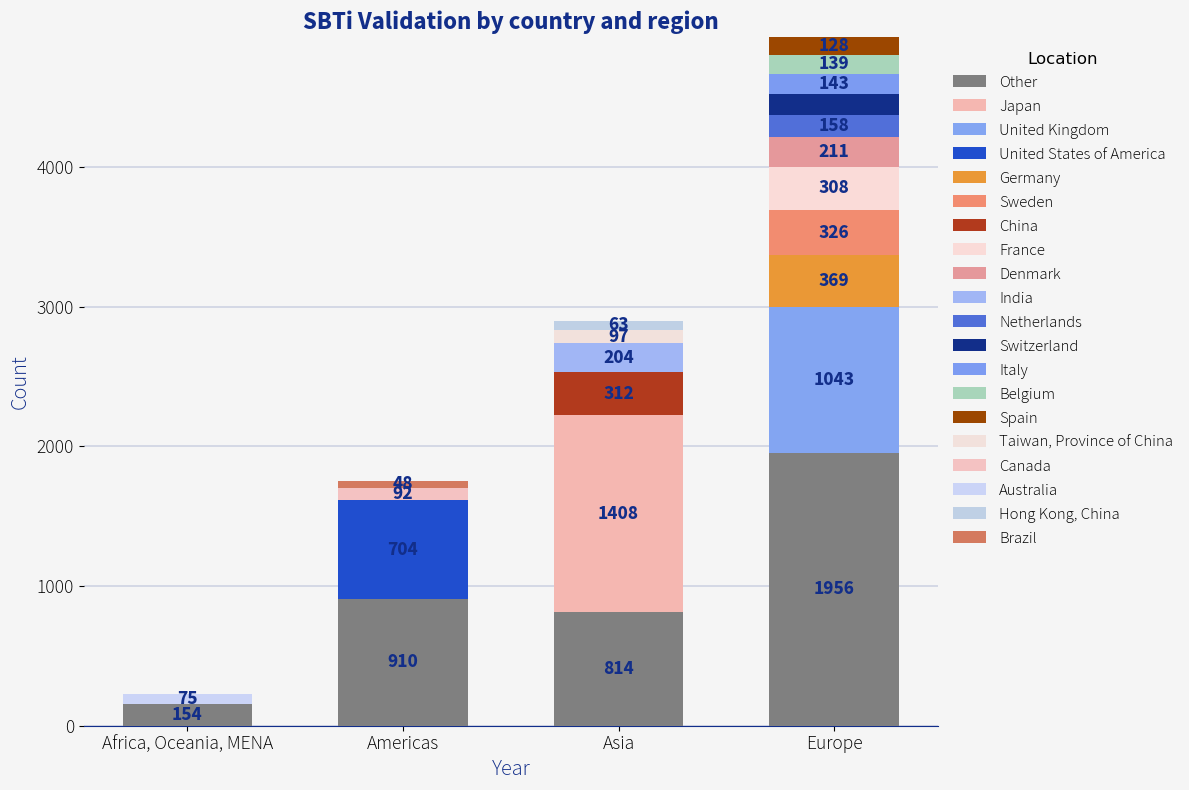

In [90]:
# Optimize data types to reduce memory usage
by_region_top['count'] = pd.to_numeric(by_region_top['count'], downcast='integer')

# Pivot the data to prepare it for stacked bar plotting
pivot_data = by_region_top.pivot(index="region", columns="location", values="count").fillna(0)

# Sort by region
pivot_data = pivot_data.sort_index()

# Convert pivot_data to a smaller data type
pivot_data = pivot_data.apply(pd.to_numeric, downcast='float')

# Adjust the width of the bars here to change the distance between them
#bar_width = 0.6  # Change this value to make bars closer (lower value) or farther apart (higher value)

# Create a new figure and axis for the plot
fig, ax = plt.subplots(figsize=(12, 8), facecolor="#f5f5f5")

# Sort locations within each region such that the highest count is closest to the x-axis and 'Other' is furthest
pivot_data = pivot_data.sort_index(axis=1, key=lambda col: col.map(lambda x: 0 if x == 'Other' else 1))

# Sort locations within each region such that the highest count is closest to the x-axis and 'Other' is furthest
pivot_data = pivot_data.reindex(pivot_data.sum(axis=0).sort_values(ascending=False).index, axis=1)

# Assign a unique color to 'Other' and ensure all 'Other' locations have the same color
other_color = '#808080'  # Gray color for 'Other'
location_colors = [other_color if col == 'Other' else sbt_palette[i % len(sbt_palette)] for i, col in enumerate(pivot_data.columns)]

# Plot stacked bars
bottom_vals = None
for i, col in enumerate(pivot_data.columns):
    if bottom_vals is None:
        bars = ax.bar(pivot_data.index, pivot_data[col], color=location_colors[i], zorder=3, width=bar_width, label=col)
        bottom_vals = pivot_data[col]
    else:
        ax.bar(pivot_data.index, pivot_data[col], color=location_colors[i], zorder=3, width=bar_width, label=col, bottom=bottom_vals)
        bottom_vals += pivot_data[col]

# Set facecolor
ax.set_facecolor("#f5f5f5")

# Set title with font properties
ax.set_title("SBTi Validation by country and region", fontproperties=font_bold, fontsize=18, fontweight='bold', color="#122E8A")
ax.set_ylabel("Count", fontproperties=font_light, fontsize=16, color="#122E8A")
ax.set_xlabel("Year", fontproperties=font_light, fontsize=16, color="#122E8A")
ax.tick_params(axis='x', labelsize=14)
ax.tick_params(axis='y', labelsize=14)

for label in ax.get_xticklabels():
    label.set_fontproperties(font_light)
    label.set_size(14)

for label in ax.get_yticklabels():
    label.set_fontproperties(font_light)
    label.set_size(14)

# Add data labels to the stacked bars
for bar_group in ax.containers:
    for bar in bar_group:
        if bar.get_height() > 0:  # Only label non-zero bars
            ax.text(
                bar.get_x() + bar.get_width() / 2, 
                bar.get_y() + bar.get_height() / 2, 
                f'{int(bar.get_height())}', 
                ha='center', va='center', fontsize=14, color="#122E8A", fontproperties=font_bold
            )

# Spines and grid
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)    
ax.spines['left'].set_visible(False)    
ax.spines['bottom'].set_color("#122E8A")
ax.yaxis.grid(True, linestyle='-', linewidth=0.2, color="#122E8A", zorder=0)
font_legend = font_manager.FontProperties(fname="C:/Fonts/SourceSansPro-Light.otf", size=12)  # Set the font size here

# Add legend with locations sorted by count in descending order
sorted_legend_labels = pivot_data.sum(axis=0).sort_values(ascending=False).index.tolist()
handles, labels = ax.get_legend_handles_labels()

# Sort handles and labels based on the sorted legend labels
sorted_handles_labels = sorted(zip(handles, labels), key=lambda x: sorted_legend_labels.index(x[1]))
sorted_handles, sorted_labels = zip(*sorted_handles_labels)

ax.legend(
    sorted_handles,
    sorted_labels,
    title="Location",
    loc="upper left",
    bbox_to_anchor=(1, 1),
    frameon=False,
    prop=font_legend,
    title_fontsize=12
)

plt.tight_layout()
plt.show()